In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('grades.csv')
df

,white_black_grade,white_grade,random_grade
0,83.333333,90.000000,99.657534
1,80.000000,80.000000,99.657534
2,75.000000,68.000000,99.315068
3,83.333333,80.000000,99.657534
4,83.333333,90.000000,99.657534
5,75.000000,68.000000,99.315068
6,80.000000,90.000000,99.657534
7,80.000000,90.000000,99.657534
8,71.428571,70.000000,99.315068
9,71.428571,70.000000,99.315068


In [3]:
# corr
df.corr()

,white_black_grade,white_grade,random_grade
white_black_grade,1.000000,0.867531,0.546963
white_grade,0.867531,1.000000,0.325169
random_grade,0.546963,0.325169,1.000000


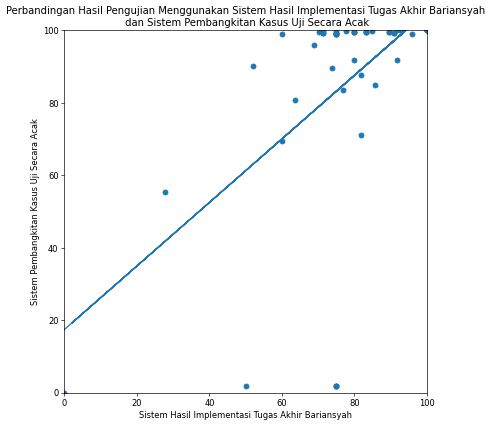

In [4]:
m, b = np.polyfit(df['white_black_grade'], df['random_grade'], 1)
fig, ax = plt.subplots(figsize=(8,8), dpi=60)
ax.scatter(df['white_black_grade'], df['random_grade'])
ax.set_title('Perbandingan Hasil Pengujian Menggunakan Sistem Hasil Implementasi Tugas Akhir Bariansyah\n dan Sistem Pembangkitan Kasus Uji Secara Acak')
ax.set_xlabel('Sistem Hasil Implementasi Tugas Akhir Bariansyah')
ax.set_ylabel('Sistem Pembangkitan Kasus Uji Secara Acak')
ax.set_xlim([0, 100])
ax.set_ylim([0, 100])
ax.set_aspect(1)
ax.plot(df['random_grade'], m*df['random_grade']+b)
plt.show()

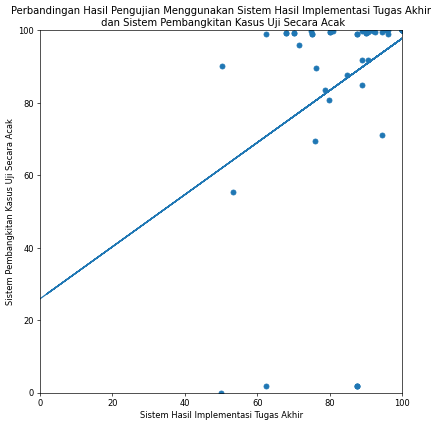

In [5]:
m, b = np.polyfit(df['white_grade'], df['random_grade'], 1)
fig, ax = plt.subplots(figsize=(8,8), dpi=60)
ax.scatter(df['white_grade'], df['random_grade'])
ax.set_title('Perbandingan Hasil Pengujian Menggunakan Sistem Hasil Implementasi Tugas Akhir\n dan Sistem Pembangkitan Kasus Uji Secara Acak')
ax.set_xlabel('Sistem Hasil Implementasi Tugas Akhir')
ax.set_ylabel('Sistem Pembangkitan Kasus Uji Secara Acak')
ax.set_xlim([0, 100])
ax.set_ylim([0, 100])
ax.set_aspect(1)
ax.plot(df['random_grade'], m*df['random_grade']+b)
plt.show()

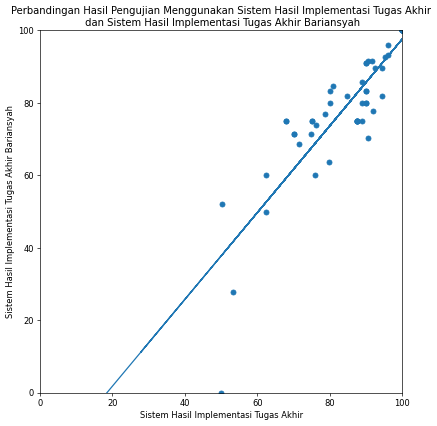

In [6]:
m, b = np.polyfit(df['white_grade'], df['white_black_grade'], 1)
fig, ax = plt.subplots(figsize=(8,8), dpi=60)
ax.scatter(df['white_grade'], df['white_black_grade'])
ax.set_title('Perbandingan Hasil Pengujian Menggunakan Sistem Hasil Implementasi Tugas Akhir\n dan Sistem Hasil Implementasi Tugas Akhir Bariansyah')
ax.set_xlabel('Sistem Hasil Implementasi Tugas Akhir')
ax.set_ylabel('Sistem Hasil Implementasi Tugas Akhir Bariansyah')
ax.set_xlim([0, 100])
ax.set_ylim([0, 100])
ax.set_aspect(1)
ax.plot(df['white_black_grade'], m*df['white_black_grade']+b)
plt.show()

In [7]:
# MAE
print('Mean Absolute Error Tugas Akhir vs Random: ', mean_absolute_error(df['white_grade'], df['random_grade']))
print('Mean Absolute Error Tugas Akhir Bari vs Random: ', mean_absolute_error(df['white_black_grade'], df['random_grade']))

Mean Absolute Error Tugas Akhir vs Random:  17.3951231945283
Mean Absolute Error Tugas Akhir Bari vs Random:  18.239033868113207


In [8]:
bins = [-0.001, 10-0.001, 20-0.001, 30-0.001, 40-0.001, 50-0.001, 60-0.001, 70-0.001, 80-0.001, 90-0.001, 100-0.001, 100+0.001]
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
cat_white=pd.cut(df['white_grade'], bins=bins, labels=labels)
cat_white_black=pd.cut(df['white_black_grade'], bins=bins, labels=labels)
cat_random=pd.cut(df['random_grade'], bins=bins, labels=labels)
categorized_grade = pd.concat([cat_white_black, cat_white, cat_random], axis=1)
categorized_grade

,white_black_grade,white_grade,random_grade
0,8,9,9
1,8,8,9
2,7,6,9
3,8,8,9
4,8,9,9
5,7,6,9
6,8,9,9
7,8,9,9
8,7,7,9
9,7,7,9


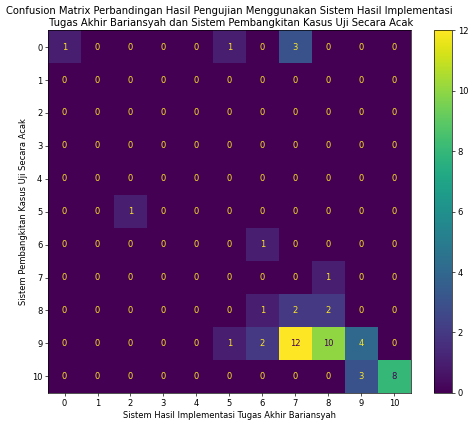

In [9]:
cm = confusion_matrix(categorized_grade['random_grade'], categorized_grade['white_black_grade'], labels = labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(10,8), dpi=60)
ax.set_title('Confusion Matrix Perbandingan Hasil Pengujian Menggunakan Sistem Hasil Implementasi\n Tugas Akhir Bariansyah dan Sistem Pembangkitan Kasus Uji Secara Acak')
disp.plot(ax = ax)
disp.ax_.set(xlabel='Sistem Hasil Implementasi Tugas Akhir Bariansyah', ylabel='Sistem Pembangkitan Kasus Uji Secara Acak')
plt.show()

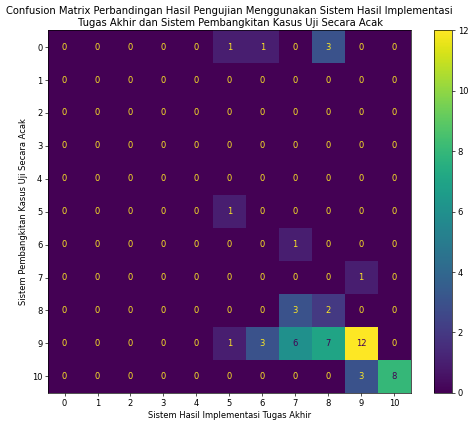

In [10]:
cm = confusion_matrix(categorized_grade['random_grade'], categorized_grade['white_grade'], labels = labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(10,8), dpi=60)
ax.set_title('Confusion Matrix Perbandingan Hasil Pengujian Menggunakan Sistem Hasil Implementasi\n Tugas Akhir dan Sistem Pembangkitan Kasus Uji Secara Acak')
disp.plot(ax = ax)
disp.ax_.set(xlabel='Sistem Hasil Implementasi Tugas Akhir', ylabel='Sistem Pembangkitan Kasus Uji Secara Acak')
plt.show()